In [ ]:
!pip install Kaggle

In [ ]:
# Upload Ka .json fil

In [1]:
import pandas as pd

url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [5]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


### Columns details

customerID       → Unique customer identifier  
gender           → Demographic  
SeniorCitizen    → Age category  
tenure           → Number of months customer stayed  
MonthlyCharges   → Monthly bill amount  
TotalCharges     → Total money paid  
Contract         → Contract type (Month-to-month / One year / Two year)  
PaymentMethod    → Mode of payment  
Churn            → Target variable (Yes = customer left)

<br>


###### Columns Likely to Impact Churn (Business Reasoning)

1. TechSupport
Customers without tech support are more likely to face unresolved issues, increasing dissatisfaction and churn risk.

2. MonthlyCharges
Higher monthly charges may lead to price sensitivity, especially when perceived value is low, increasing churn probability.

3. OnlineServices (OnlineSecurity / Streaming / InternetService)
Customers using more services are more engaged with the platform, reducing the likelihood of churn.

4. DeviceProtection
Customers with device protection are financially invested and more likely to stay longer.

5. Contract Type
Month-to-month contracts allow easy exit, while long-term contracts (1–2 years) significantly reduce churn.

###### Data cleaning


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN
df['TotalCharges'].isnull().sum()

np.int64(11)

In [8]:
# Numeric columns: fill NaN with median
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns: fill NaN with mode (if any)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

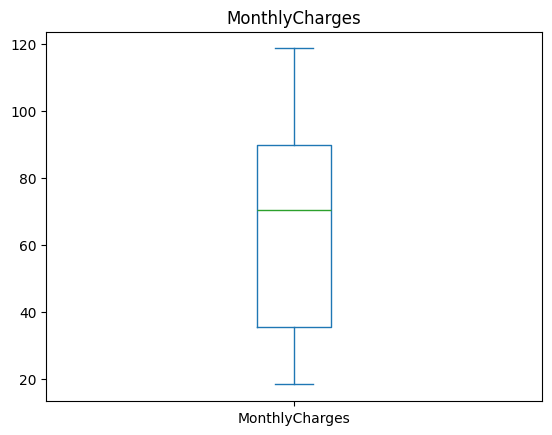

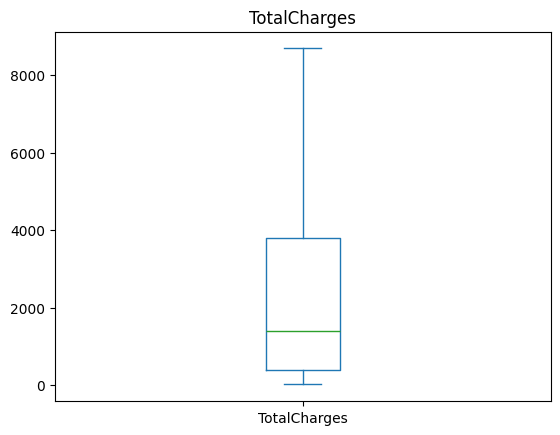

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
### Inspect outliers
import matplotlib.pyplot as plt

df['MonthlyCharges'].plot(kind='box', title='MonthlyCharges')
plt.show()

df['TotalCharges'].plot(kind='box', title='TotalCharges')
plt.show()
print(df.info())
df.isnull().sum()

In [10]:
### Cleaned dataset with no missing values; numeric columns converted; ready for feature engineering

df.to_csv('cleaned_churn.csv', index=False)

###### FEATURE REVIEW & LEAKAGE CHECK